# Decision Trees & Random Forests

### Load Data & Preprocess

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')     
display(df.head())
print(df.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [7]:
display(df.tail(10))
print("Shape:", df.shape)
print("\nInfo:")
display(df.info())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nTarget value counts:\n", df['target'].value_counts(normalize=False))
print("\nTarget distribution (normalized):\n", df['target'].value_counts(normalize=True))


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Shape: (1025, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None


Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Target value counts:
 target
1    526
0    499
Name: count, dtype: int64

Target distribution (normalized):
 target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


### Basic statistical summary & distributions

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


<Figure size 1400x1000 with 0 Axes>

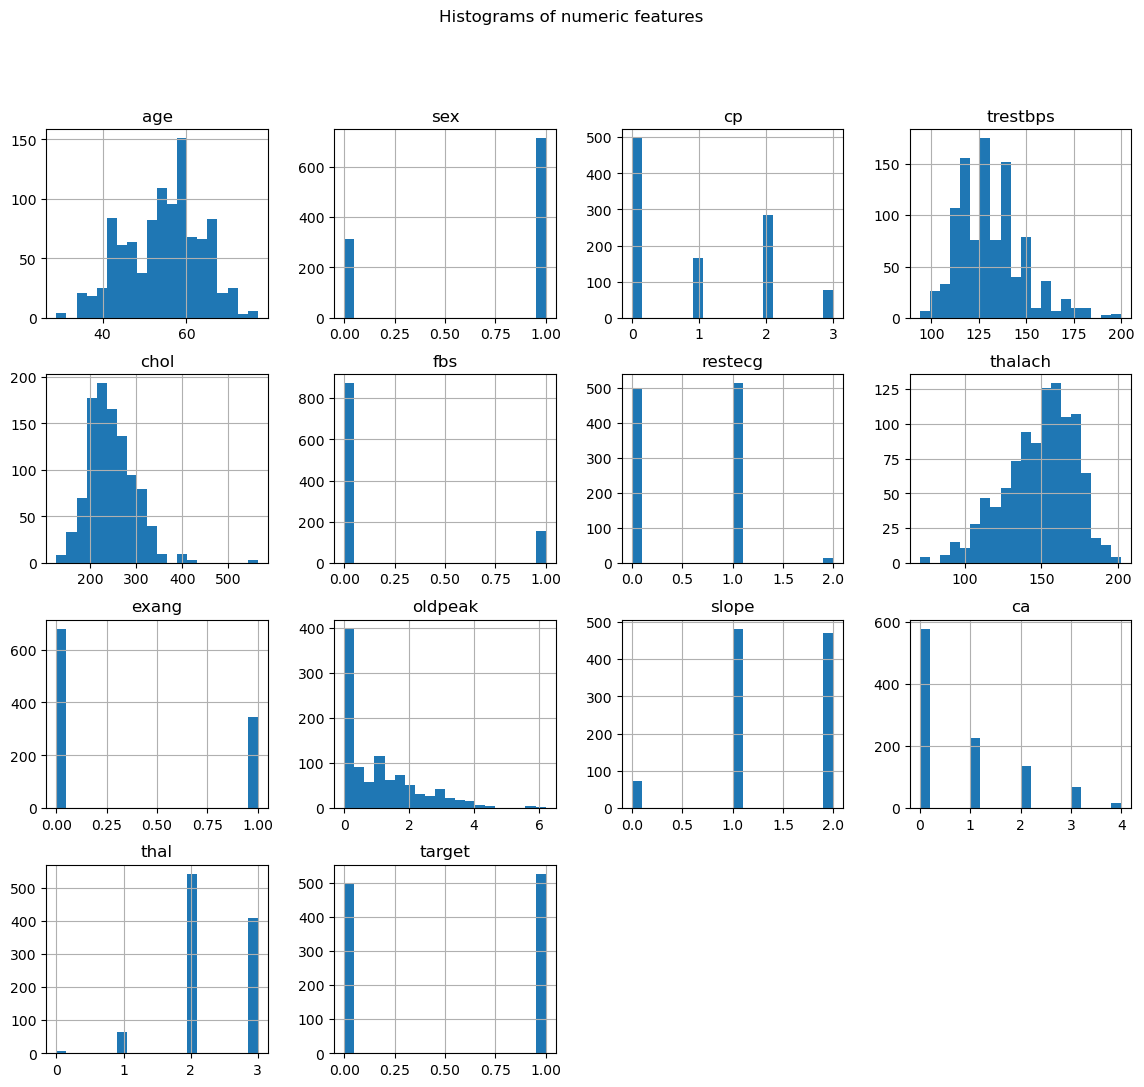

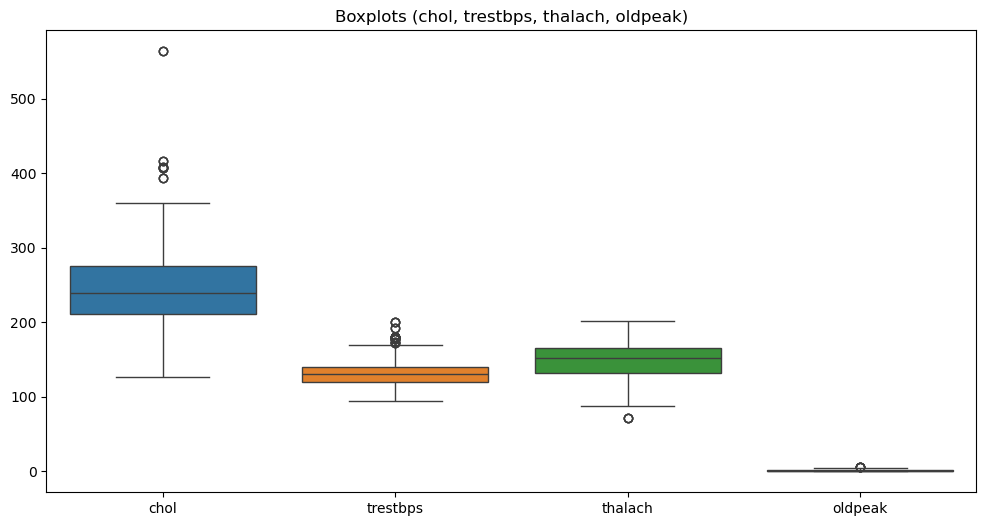

In [8]:
display(df.describe().T)

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(14,10))
df[num_cols].hist(bins=20, figsize=(14,12))
plt.suptitle("Histograms of numeric features")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['chol','trestbps','thalach','oldpeak']])
plt.title("Boxplots (chol, trestbps, thalach, oldpeak)")
plt.show()


### Correlation & target relationships

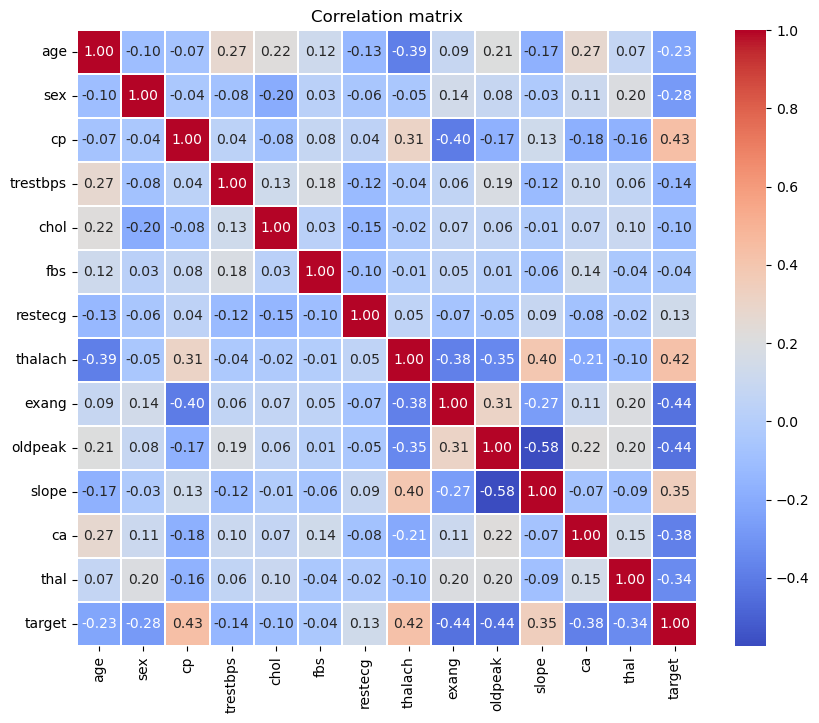

,age,thalach,oldpeak,chol
target,,,,
0,56.569138,139.130261,1.600200,251.292585
1,52.408745,158.585551,0.569962,240.979087


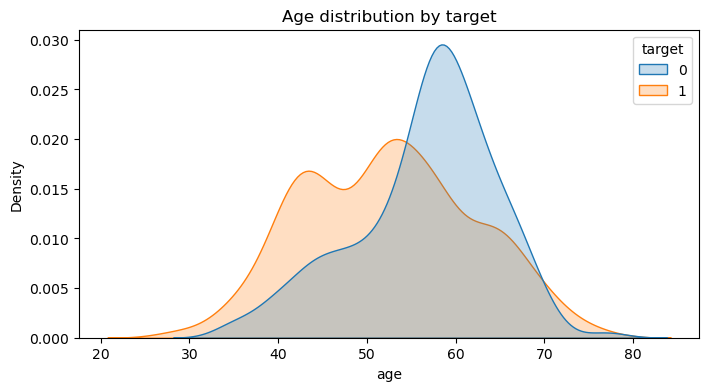

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.3)
plt.title("Correlation matrix")
plt.show()

display(df.groupby('target')[['age','thalach','oldpeak','chol']].mean())

plt.figure(figsize=(8,4))
sns.kdeplot(data=df, x='age', hue='target', fill=True)
plt.title('Age distribution by target')
plt.show()


### Preprocessing for tree models

In [10]:
for c in df.columns:
    if df[c].isnull().any():
        if df[c].dtype.kind in 'biufc':  # numeric
            df[c] = df[c].fillna(df[c].median())
        else:
            df[c] = df[c].fillna(df[c].mode().iloc[0])

target = 'target'
X = df.drop(columns=[target])
y = df[target]

feature_names = X.columns.tolist()

### Train/Test split (stratified)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))

Train: (820, 13) Test: (205, 13)
Train class distribution:
 target
1    0.513415
0    0.486585
Name: proportion, dtype: float64


### Baseline Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Train acc:", accuracy_score(y_train, y_pred_train))
print("Test acc :", accuracy_score(y_test, y_pred_test))
print("\nClassification report (test):\n", classification_report(y_test, y_pred_test))

Train acc: 1.0
Test acc : 0.9853658536585366

Classification report (test):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Visualize tree (small depth) — understand splits

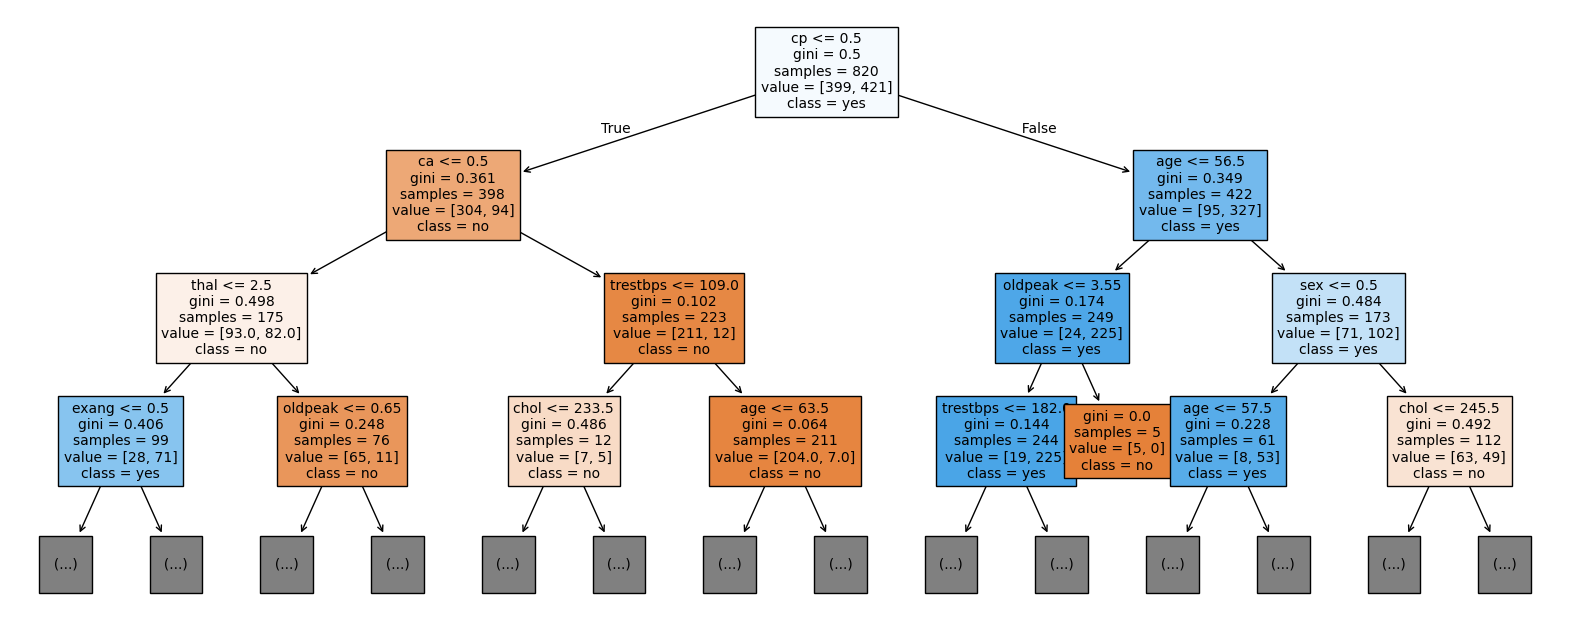

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,8))
plot_tree(dt, feature_names=feature_names, class_names=['no','yes'], filled=True, max_depth=3, fontsize=10)
plt.show()


#### Note - set max_depth=3 to keep plot readable.

### Control overfitting: tune max_depth / min_samples_split

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2,3,4,5,6,8, None],
    'min_samples_split': [2,5,10,20]
}

dt_gs = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
dt_gs.fit(X_train, y_train)
print("Best params:", dt_gs.best_params_)
best_dt = dt_gs.best_estimator_

from sklearn.metrics import roc_auc_score
y_test_pred = best_dt.predict(X_test)
y_test_prob = best_dt.predict_proba(X_test)[:,1]
print("Best DT Test acc:", accuracy_score(y_test, y_test_pred))
print("Best DT Test AUC:", roc_auc_score(y_test, y_test_prob))

Best params: {'max_depth': None, 'min_samples_split': 5}
Best DT Test acc: 0.9853658536585366
Best DT Test AUC: 0.9857142857142858


### Random Forest training & compare

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)
y_rf_prob = rf.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score
print("Random Forest Test acc:", accuracy_score(y_test, y_rf_pred))
print("Random Forest Test AUC:", roc_auc_score(y_test, y_rf_prob))

Random Forest Test acc: 1.0
Random Forest Test AUC: 1.0


### Feature importance (mean impurity) + permutation importance

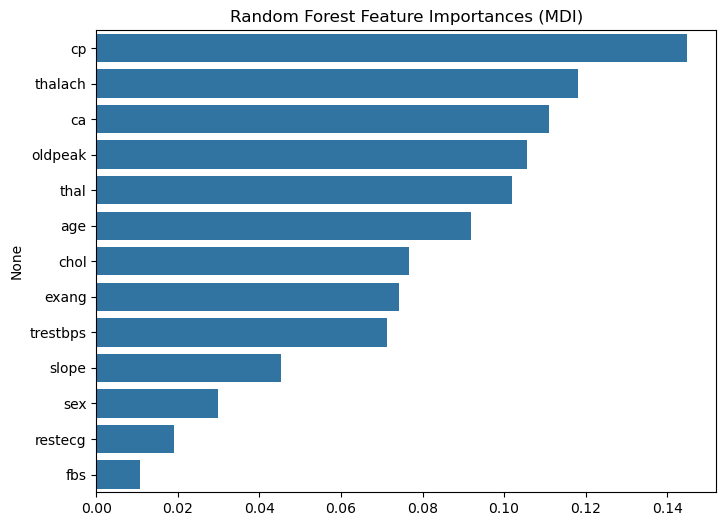

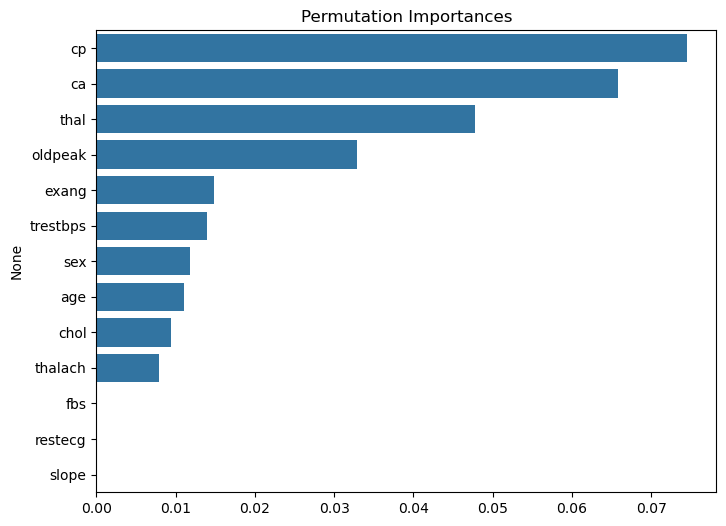

In [16]:
# Mean decrease impurity
importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importances.values[:15], y=importances.index[:15])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_imp = pd.Series(r.importances_mean, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=perm_imp.values[:15], y=perm_imp.index[:15])
plt.title("Permutation Importances")
plt.show()

### Cross-validation / stability check

In [17]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
print("RF CV AUC scores:", cv_scores)
print("Mean AUC:", cv_scores.mean())


RF CV AUC scores: [1.         1.         1.         1.         0.99885649]
Mean AUC: 0.9997712978845055


### Learning curve & complexity curve

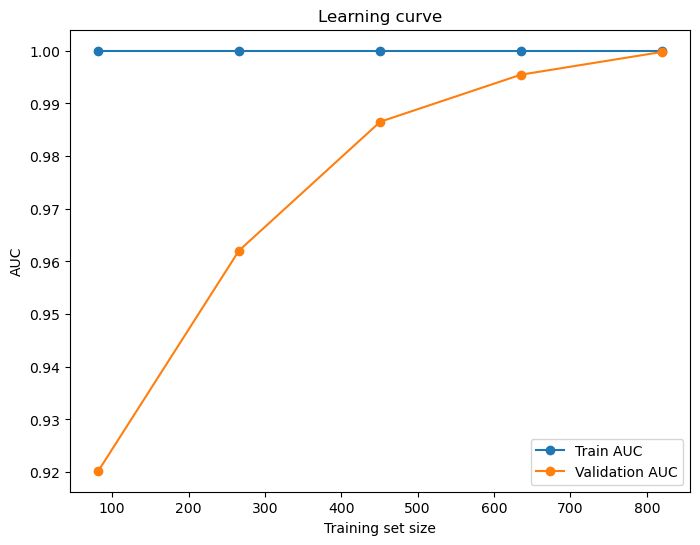

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(rf, X, y, cv=5, scoring='roc_auc', train_sizes=np.linspace(0.1,1.0,5), n_jobs=-1)
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label='Train AUC')
plt.plot(train_sizes, val_mean, 'o-', label='Validation AUC')
plt.xlabel('Training set size')
plt.ylabel('AUC')
plt.title('Learning curve')
plt.legend()
plt.show()

## Saving best models

In [19]:
import joblib
joblib.dump(rf, 'rf_heart_model.joblib')
joblib.dump(best_dt, 'dt_heart_model.joblib')


['dt_heart_model.joblib']

### Quick-run script


Test acc: 1.0
Test AUC: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



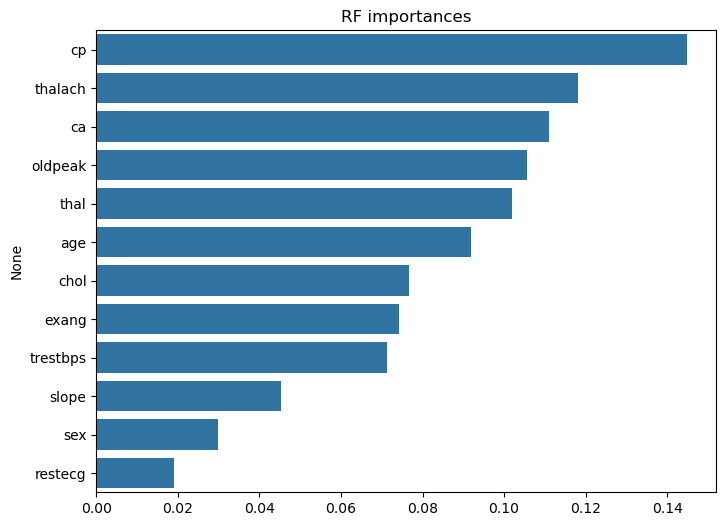

In [21]:
# Combined quick-run
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv("heart.csv")
X = df.drop(columns=['target']); y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test); y_prob = rf.predict_proba(X_test)[:,1]
print("Test acc:", accuracy_score(y_test, y_pred))
print("Test AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Feature importances
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6)); sns.barplot(x=feat_imp.values[:12], y=feat_imp.index[:12]); plt.title("RF importances"); plt.show()


## Model Inference and Key Insights
#### 1. Why Random Forest Performs Better Than a Single Decision Tree
Random Forest is an ensemble of many independent decision trees.
Each tree sees a slightly different subset of the data and features.
This reduces the variance seen in a single deep tree, which tends to overfit.
As a result, Random Forest provides more stable and accurate predictions on unseen data.

2. Rationale Behind Using GridSearch for Decision Tree Hyperparameters
Decision Trees easily overfit when they grow too deep or split too often.
GridSearch helps identify:
An optimal tree depth
Minimum number of samples required for a split
Other constraints that prevent overfitting
This ensures the Decision Tree model generalizes better.

3. No Feature Scaling Required for Tree-Based Models
Tree algorithms (Decision Tree, Random Forest) are based on threshold splits, not distance calculations.
Splits such as “age < 50” or “chol > 240” are not affected by scaling.
Therefore, standardization or normalization of features is unnecessary for tree-based models.

4. MDI vs Permutation Feature Importance
MDI (Mean Decrease in Impurity)
Default importance measure in RandomForest
Fast to compute
Can be biased toward features with many unique values
Permutation Importance
Measures the actual drop in model performance when a feature is randomly shuffled
Reflects a feature’s true predictive contribution
More reliable and model-agnostic
In practice, permutation importance provides a better understanding of which features genuinely matter.

5. Importance of Cross-Validation in Tree-Based Models
Cross-validation evaluates the model on multiple train-test splits.
Prevents misleading performance caused by a single “lucky” or “unlucky” split.
Provides a more stable estimate of model performance.
Useful for confirming whether the model is overfitting or underfitting.

6. Ways to Improve Overall Model Performance
Adjust class imbalance using:
class_weight = "balanced" in Decision Tree or Random Forest
Increase diversity of trees by tuning:
max_features
min_samples_split
min_samples_leaf
Improve ensemble performance using:
n_estimators = 300–500 or higher
For stronger performance, upgrade to gradient boosting models such as:
XGBoost
LightGBM
CatBoost
These methods handle complex nonlinear patterns better and often outperform Random Forest.